# Introduction to Data Engineering

Firat YASAR

Data & Cloud Engineer @ SFEIR

# 1. Data Engineering

What is Data Engineering?


What is ETL?

- Extract
- Transform
- Load

There are lots of platforms, softwares, tools used in Data Engineering.

- Data Warehouse
- Data Lakehouse

API (application programming interface)

In [1]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import string
from collections import Counter
import requests
from wordcloud import WordCloud

## 1.1 Extract

Get the textual data

Note that we use ``requests`` library to extract data from a website (from wikipedia).

We define a function ``wikipedia_page`` which returns the page of a title.

In [2]:
def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

For example, let's fetch the article "France" from Wikipedia. To minimize space usage, I will only take the first 250 characters of the text.

In [3]:
france = wikipedia_page('France')
print ("Here is the beginning of the text (limited to 250 caracters):\n")
print(france[:250]) 

Here is the beginning of the text (limited to 250 caracters):

France (French: [fʁɑ̃s] ), officially the French Republic (French: République française [ʁepyblik fʁɑ̃sɛz]), is a country located primarily in Western Europe. It also includes overseas regions and territories in the Americas and the Atlantic, Pacific


## 1.2 Transform

In this section, we will transform the text and extract the 20 most common words in it. Let us first see how it will look like using a wordcloud:

In [4]:
# Define the list of words you want to remove from the text
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'many', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'also', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'since', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 'largest', 'smallest', 'can', 'will', 'just', 'don', 'should', 'now', 'first', 'second', 'one', 'two', 'among'
]

In [5]:
# Instantiate a wordcloud
wordcloud = WordCloud(random_state=8,
                      normalize_plurals=True,
                      width=600,
                      height=300,
                      max_words=300,
                      stopwords=stopwords).generate(france.lower()) # we lowercase the text to avoid having to deal with uppercase and capitalized words

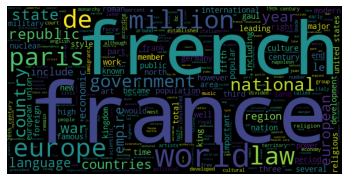

In [6]:
# Display the generated Word Cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now we will compute the frequency of each word and get the most common 20 words in the text:

In [7]:
# We transform the text into a list of words by splitting over the space character ' '
france_word_list = france.lower().split(' ')

# and count the words
common_france = Counter(france_word_list).most_common(20)
common_france

[('the', 1600),
 ('of', 766),
 ('and', 712),
 ('in', 593),
 ('to', 272),
 ('a', 233),
 ('french', 206),
 ('france', 193),
 ('is', 177),
 ('as', 162),
 ('by', 159),
 ('was', 145),
 ('with', 106),
 ('for', 104),
 ('are', 90),
 ('from', 88),
 ('which', 85),
 ('most', 81),
 ('it', 77),
 ('its', 68)]

Not a useful list. Let us do it again by removing the stopwords and punctuation:

In [8]:
# Remove punctuation 
punctuation = set(string.punctuation)
france = ''.join(w for w in france if w not in punctuation)

# We transform the text into a list of words by splitting over the space character ' '
france_word_list = france.lower().split(' ')

# Remove the stopwords from france_word_list
france_without_stopwords = [word for word in france_word_list if word not in stopwords]

In [9]:
common_france = Counter(france_without_stopwords).most_common(20)
common_france

[('france', 251),
 ('french', 225),
 ('world', 70),
 ('de', 68),
 ('century', 62),
 ('million', 52),
 ('europe', 47),
 ('national', 47),
 ('paris', 45),
 ('european', 43),
 ('law', 37),
 ('war', 35),
 ('government', 33),
 ('republic', 28),
 ('economic', 28),
 ('country', 27),
 ('empire', 27),
 ('major', 26),
 ('state', 25),
 ('louis', 25)]

## 1.3 Load

Let us create an empty dataframe.

It will have 1 + 20 columns:
- title = the title of the article
- word_i = i_th most common words in the article

In [10]:
# Construct the column names
column_names = [f'word_{i+1}' for i in range(20)]

# Create an empty list
data = []

# Create the pandas DataFrame
df = pd.DataFrame(
    data, columns=['title'] + column_names)

# Print dataframe.
df

,title,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20


As seen here, we now have an empty dataframe. Let us add rows to it:

In [11]:
def add_new (title, common):
    df.loc[df.shape[0]] = [title] + [common[index] for index in range(20)]
    df.drop_duplicates(subset=['title'],inplace=True) # remove duplicate rows
    df.reset_index(drop=True, inplace=True)
    return df

Add the wikipedia article "France"

In [12]:
add_new("France", common_france)

,title,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20
0,France,"(france, 251)","(french, 225)","(world, 70)","(de, 68)","(century, 62)","(million, 52)","(europe, 47)","(national, 47)","(paris, 45)",...,"(law, 37)","(war, 35)","(government, 33)","(republic, 28)","(economic, 28)","(country, 27)","(empire, 27)","(major, 26)","(state, 25)","(louis, 25)"


Save as a csv file:

In [13]:
df.to_csv('data/result.csv')

Let us add a new row. This time we add "United States" wiki article:

In [14]:
# Get the raw text
usa = wikipedia_page('United States')

# Remove punctuation 
usa = ''.join(w for w in usa if w not in punctuation)

# We transform the text into a list of words by splitting over the space character ' '
usa_word_list = usa.lower().split(' ')

# use a python list comprehension to remove the stopwords from words_list
usa_without_stopwords = [word for word in usa_word_list if word not in stopwords]

common_usa = Counter(usa_without_stopwords).most_common(20)
common_usa

[('states', 167),
 ('united', 153),
 ('us', 121),
 ('american', 90),
 ('world', 54),
 ('war', 48),
 ('worlds', 43),
 ('americans', 38),
 ('federal', 35),
 ('new', 35),
 ('million', 34),
 ('country', 33),
 ('population', 33),
 ('america', 28),
 ('government', 24),
 ('nations', 23),
 ('national', 23),
 ('north', 22),
 ('major', 22),
 ('state', 21)]

As you see, we followed the same procedure for "usa" as we did it for "france"

In [15]:
add_new("United States", common_usa)

,title,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_11,word_12,word_13,word_14,word_15,word_16,word_17,word_18,word_19,word_20
0,France,"(france, 251)","(french, 225)","(world, 70)","(de, 68)","(century, 62)","(million, 52)","(europe, 47)","(national, 47)","(paris, 45)",...,"(law, 37)","(war, 35)","(government, 33)","(republic, 28)","(economic, 28)","(country, 27)","(empire, 27)","(major, 26)","(state, 25)","(louis, 25)"
1,United States,"(states, 167)","(united, 153)","(us, 121)","(american, 90)","(world, 54)","(war, 48)","(worlds, 43)","(americans, 38)","(federal, 35)",...,"(million, 34)","(country, 33)","(population, 33)","(america, 28)","(government, 24)","(nations, 23)","(national, 23)","(north, 22)","(major, 22)","(state, 21)"


In [17]:
df.to_csv('data/result.csv')

# 2. Data Engineering tools

Programming Languages
- Python
- C++
- C#

- SQL

- Bash, Linux commands
- and more...

Platforms
- Databricks
- GCP Dataflow

there are lots of them.

# 3. Cloud

**Cloud computing**
	- on demand, self-service
	- on internet
	- no worries for physical location
	- elastic
	- pay only what you use

**3 waves on the history of cloud computing**
	- colocation
	- virtualisation
	- container-based architecture

**IaaS (Infrastructure as a Service) & PaaS (Platform as a Service)**

In the IaaS model, customers pay for the resources they allocate ahead of time; 
In the PaaS model, customers pay for the resources they actually use.

```ad-warning
IaaS provides raw compute, storage, and network resources that are organised similarly to physical data centers

PaaS binds application code to libraries that give access to the infrastructure an application needs
```


IBM
GOOGLE CLOUD
AZURE
AMAZON WEB SERVICE

Docker ve Kubernetes

## Homework

Write a python application that takes one positional argument ``article``. 
The script must 
- extract the text file from the wikipedia
- transform the text as we did above
- load the article using add_new function above

When you run the script, it must load the new article to the file results.csv

### Step 1.

Complete the following

```python
import sys

def wiki_function (article):
    # write your code here 


if __name__ == "__main__":
    article = str(sys.argv[1])
    wiki_function(article)
```

### Step 2. 

Create a file ``app.py`` and put the code in the previous cell into this file.

### Step 3. How to use the script ?

open terminal
and put 

```shell
python app.py <"the_title">
```

For instance, if you put 

```shell
python app.py "sun"
```

it will load the data into result.csv